<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy 
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ? 
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [2]:
#Importation du fichier population.csv
population = pd.read_csv('DAN-P4-FAO/population.csv')
df_population = pd.DataFrame(population)

#Importation du fichier dispo_alimentaire.csv
dispo_alimentaire = pd.read_csv('DAN-P4-FAO/dispo_alimentaire.csv')

#Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv('DAN-P4-FAO/aide_alimentaire.csv')

#Importation du fichier sous_nutrition.csv
sous_nutrition = pd.read_csv('DAN-P4-FAO/sous_nutrition.csv')

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [3]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [4]:
#Consulter le nombre de colonnes
nb_colonne = population.shape[1]
print(f'Il y a {nb_colonne} colonne(s)')
#La nature des données dans chacune des colonnes
population.dtypes
#Le nombre de valeurs présentes dans chacune des colonnes
nb_valeur_not_null = population.count()

print('Nombre de valeurs non nulles dans chaque colonne :')
print(nb_valeur_not_null)

Il y a 3 colonne(s)
Nombre de valeurs non nulles dans chaque colonne :
Zone      1416
Année     1416
Valeur    1416
dtype: int64


In [5]:
#Affichage les 5 premières lignes de la table
print('Les 5 premières lignes : ')
print(population.head(5))

Les 5 premières lignes : 
          Zone  Année     Valeur
0  Afghanistan   2013  32269.589
1  Afghanistan   2014  33370.794
2  Afghanistan   2015  34413.603
3  Afghanistan   2016  35383.032
4  Afghanistan   2017  36296.113


In [6]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000
population['Valeur'] = population['Valeur'] * 1000
print(population['Valeur'])

0       32269589.0
1       33370794.0
2       34413603.0
3       35383032.0
4       36296113.0
           ...    
1411    13586707.0
1412    13814629.0
1413    14030331.0
1414    14236595.0
1415    14438802.0
Name: Valeur, Length: 1416, dtype: float64


In [7]:
#changement du nom de la colonne Valeur par Population
population.rename(columns={'Valeur': 'Population'}, inplace=True)

In [8]:
#Affichage les 5 premières lignes de la table pour voir les modifications
population.head(5)

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [9]:
#Afficher les dimensions du dataset
print("dimension du dataset : ", dispo_alimentaire.shape)

dimension du dataset :  (15605, 18)


In [10]:
#Consulter le nombre de colonnes
print("Il y a {} colonne(s) dans ce dataset".format(dispo_alimentaire.shape[1]))

Il y a 18 colonne(s) dans ce dataset


In [11]:
#Affichage les 5 premières lignes de la table
print(dispo_alimentaire.head(5))

          Zone                Produit   Origine  Aliments pour animaux  \
0  Afghanistan       Abats Comestible   animale                    NaN   
1  Afghanistan        Agrumes, Autres  vegetale                    NaN   
2  Afghanistan  Aliments pour enfants  vegetale                    NaN   
3  Afghanistan                 Ananas  vegetale                    NaN   
4  Afghanistan                Bananes  vegetale                    NaN   

   Autres Utilisations  Disponibilité alimentaire (Kcal/personne/jour)  \
0                  NaN                                             5.0   
1                  NaN                                             1.0   
2                  NaN                                             1.0   
3                  NaN                                             0.0   
4                  NaN                                             4.0   

   Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               1

In [12]:
#remplacement des NaN dans le dataset par des 0
dispo_alimentaire.fillna(0, inplace=True)
dispo_alimentaire.head(5)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0


In [13]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
#dispo_alimentaire

In [14]:
#Affichage les 5 premières lignes de la table
print(dispo_alimentaire.head(5))

          Zone                Produit   Origine  Aliments pour animaux  \
0  Afghanistan       Abats Comestible   animale                    0.0   
1  Afghanistan        Agrumes, Autres  vegetale                    0.0   
2  Afghanistan  Aliments pour enfants  vegetale                    0.0   
3  Afghanistan                 Ananas  vegetale                    0.0   
4  Afghanistan                Bananes  vegetale                    0.0   

   Autres Utilisations  Disponibilité alimentaire (Kcal/personne/jour)  \
0                  0.0                                             5.0   
1                  0.0                                             1.0   
2                  0.0                                             1.0   
3                  0.0                                             0.0   
4                  0.0                                             4.0   

   Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               1

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [15]:
#Afficher les dimensions du dataset
print("Voici les dimensions du dataset", aide_alimentaire.shape)

Voici les dimensions du dataset (1475, 4)


In [16]:
#Consulter le nombre de colonnes
print("Il y a {} colonne(s) dans ce dataset".format(aide_alimentaire.shape[1]))

Il y a 4 colonne(s) dans ce dataset


In [17]:
#Affichage les 5 premières lignes de la table
print(aide_alimentaire.head(5))

  Pays bénéficiaire  Année              Produit  Valeur
0       Afghanistan   2013  Autres non-céréales     682
1       Afghanistan   2014  Autres non-céréales     335
2       Afghanistan   2013         Blé et Farin   39224
3       Afghanistan   2014         Blé et Farin   15160
4       Afghanistan   2013             Céréales   40504


In [18]:
#changement du nom de la colonne Pays bénéficiaire par Zone
aide_alimentaire.rename(columns={'Pays bénéficiaire':"Zone"}, inplace=True)
aide_alimentaire.head(5)

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [19]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide_alimentaire['Valeur'] *= 1000

In [20]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head(5)

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [21]:
#Afficher les dimensions du dataset
print("Dimension du dataset : ", format(sous_nutrition.shape))

Dimension du dataset :  (1218, 3)


In [22]:
#Consulter le nombre de colonnes
print("Il y a {} colonne(s) dans ce dataset".format(sous_nutrition.shape[1]))

Il y a 3 colonne(s) dans ce dataset


In [23]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head(5)

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [24]:
sous_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


In [25]:
#Conversion de la colonne sous nutrition en numérique
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'], errors='coerce')
sous_nutrition.head(5)

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [26]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
#Puis remplacement des NaN en 0
sous_nutrition.fillna(0, inplace=True)
print(sous_nutrition.head(100))

           Zone      Année  Valeur
0   Afghanistan  2012-2014     8.6
1   Afghanistan  2013-2015     8.8
2   Afghanistan  2014-2016     8.9
3   Afghanistan  2015-2017     9.7
4   Afghanistan  2016-2018    10.5
..          ...        ...     ...
95      Bahreïn  2017-2019     0.0
96   Bangladesh  2012-2014    21.7
97   Bangladesh  2013-2015    22.4
98   Bangladesh  2014-2016    23.3
99   Bangladesh  2015-2017    22.3

[100 rows x 3 columns]


In [27]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nutrition.rename(columns={'Valeur':'sous_nutrition'}, inplace=True)
print(sous_nutrition.head(5))

          Zone      Année  sous_nutrition
0  Afghanistan  2012-2014             8.6
1  Afghanistan  2013-2015             8.8
2  Afghanistan  2014-2016             8.9
3  Afghanistan  2015-2017             9.7
4  Afghanistan  2016-2018            10.5


In [28]:
#Multiplication de la colonne sous_nutrition par 1000000
sous_nutrition['sous_nutrition'] *= 1000000

In [29]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head(5)

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [30]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017
resultat = pd.merge(population[population['Année']==2017], sous_nutrition[sous_nutrition['Année'].isin(['2015-2017', '2016-2018', '2017-2019'])], on='Zone', how='inner')

In [31]:
#Permet de voir les valeurs uniques
sous_nutrition["Année"].unique()

array(['2012-2014', '2013-2015', '2014-2016', '2015-2017', '2016-2018',
       '2017-2019'], dtype=object)

In [32]:
#Affichage du dataset
resultat.head()

,Zone,Année_x,Population,Année_y,sous_nutrition
0,Afghanistan,2017,36296113.0,2015-2017,9700000.0
1,Afghanistan,2017,36296113.0,2016-2018,10500000.0
2,Afghanistan,2017,36296113.0,2017-2019,11100000.0
3,Afrique du Sud,2017,57009756.0,2015-2017,3000000.0
4,Afrique du Sud,2017,57009756.0,2016-2018,3100000.0


In [33]:
resultat.drop('Année_x', axis=1, inplace=True)

In [34]:
resultat.rename(columns={'Année_y':'Année'}, inplace=True)
resultat.head()

,Zone,Population,Année,sous_nutrition
0,Afghanistan,36296113.0,2015-2017,9700000.0
1,Afghanistan,36296113.0,2016-2018,10500000.0
2,Afghanistan,36296113.0,2017-2019,11100000.0
3,Afrique du Sud,57009756.0,2015-2017,3000000.0
4,Afrique du Sud,57009756.0,2016-2018,3100000.0


In [35]:
#Calcul et affichage du nombre de personnes en état de sous nutrition
resultat['Proportion_sous_nutrition'] = resultat['sous_nutrition'] * 100 /resultat['Population']
resultat.head()

,Zone,Population,Année,sous_nutrition,Proportion_sous_nutrition
0,Afghanistan,36296113.0,2015-2017,9700000.0,26.724625
1,Afghanistan,36296113.0,2016-2018,10500000.0,28.928718
2,Afghanistan,36296113.0,2017-2019,11100000.0,30.581787
3,Afrique du Sud,57009756.0,2015-2017,3000000.0,5.262257
4,Afrique du Sud,57009756.0,2016-2018,3100000.0,5.437666


In [36]:
Population_2017 = resultat[resultat['Année']=='2016-2018']
Population_totale_2017 = Population_2017['Population'].sum()
sous_nutrition_2017 = Population_2017['sous_nutrition'].sum()

print(sous_nutrition_2017)
print(Population_totale_2017)
print(sous_nutrition_2017/Population_totale_2017*100)

535700000.0
7543798779.0
7.1011968332354165


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [37]:
#Combien mange en moyenne un être humain ? Source => Voir sur FAO
#En moyenne un être humain a besoin de 2350 kcal


In [38]:
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0


In [39]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
dispo_alimentaire_population = dispo_alimentaire.merge(population[population['Année']==2017], on='Zone', how='inner')

In [40]:
#Affichage du nouveau dataframe
dispo_alimentaire_population.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0,2017,36296113.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0,2017,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0


In [41]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement
dispo_alimentaire_population['dispo_kcal'] = dispo_alimentaire_population['Disponibilité alimentaire (Kcal/personne/jour)']*dispo_alimentaire_population['Population']

In [42]:
dispo_alimentaire_population.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,dispo_kcal
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,...,0.0,53.0,0.0,53.0,0.0,0.0,0.0,2017,36296113.0,181480565.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,...,40.0,39.0,2.0,3.0,0.0,0.0,0.0,2017,36296113.0,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,...,82.0,82.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,145184452.0


In [43]:
#Calcul du nombre d'humains pouvant être nourris
dispo_alimentaire_population['dispo_kcal'].sum()

20918984627331.0

In [44]:
7543798779*2000

15087597558000

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [45]:
#Transfert des données avec les végétaux dans un nouveau dataframe
dispo_alim_vege_pop = dispo_alimentaire_population.loc[dispo_alimentaire_population['Origine'] == 'vegetale']

In [46]:
dispo_alim_vege_pop.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,dispo_kcal
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,...,40.0,39.0,2.0,3.0,0.0,0.0,0.0,2017,36296113.0,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,...,82.0,82.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,145184452.0
6,Afghanistan,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,0.00,3.0,...,3.0,3.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,0.0


In [47]:
#Calcul du nombre de kcal disponible pour les végétaux
dispo_alim_vege_pop['dispo_kcal'].sum()

17260764211501.0

In [48]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux
dispo_alim_vege_pop['dispo_kcal'].sum() / 2000

8630382105.7505

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [49]:
#Calcul de la disponibilité totale
labels = 'Autres Utilisations', 'Semences', 'Pertes', 'Nourriture', 'Aliments pour animaux', 'Traitement'
dispo_int = dispo_alimentaire_population[['Autres Utilisations', 'Semences', 'Pertes', 'Nourriture', 'Aliments pour animaux', 'Traitement']].sum()

In [50]:
dispo_int.dtypes

dtype('float64')

In [51]:
columns_dispo_int = ['Autres Utilisations', 'Semences', 'Pertes', 'Nourriture', 'Aliments pour animaux', 'Traitement']
disponibilite_int = pd.DataFrame(columns=["Colonnes", "Somme"])

In [52]:
for colonne in columns_dispo_int:
    somme = dispo_alimentaire_population[colonne].sum()
    df_colonne_somme = pd.DataFrame({"Colonnes": [colonne], "Somme": [somme]})
    disponibilite_int = pd.concat([disponibilite_int, df_colonne_somme], ignore_index=True)

In [53]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures, 
value_dispo_int = []
for index, row in disponibilite_int.iterrows():
    print(f'Somme pour {row["Colonnes"]} : {row["Somme"]}')
    value_dispo_int.append(row["Somme"])

Somme pour Autres Utilisations : 858771.0
Somme pour Semences : 153317.0
Somme pour Pertes : 452283.0
Somme pour Nourriture : 4805525.0
Somme pour Aliments pour animaux : 1288002.0
Somme pour Traitement : 2185641.0


In [54]:
disponibilite_int_tot = disponibilite_int["Somme"].sum()
print(disponibilite_int_tot)
print("le taux de nourriture animale est de {:.2f}%".format(1288002/disponibilite_int_tot * 100))
print("taux de perte {:.2f}%".format(452283/disponibilite_int_tot * 100))
print("taux de nourriture {:.2f}%".format(4805525/disponibilite_int_tot * 100))

9743539.0
le taux de nourriture animale est de 13.22%
taux de perte 4.64%
taux de nourriture 49.32%


In [55]:
value_dispo_int

[858771.0, 153317.0, 452283.0, 4805525.0, 1288002.0, 2185641.0]

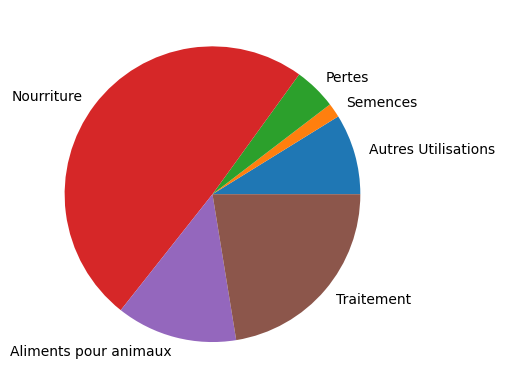

In [56]:
fig, ax = plt.subplots()
ax.pie(value_dispo_int, labels=labels)
plt.show()

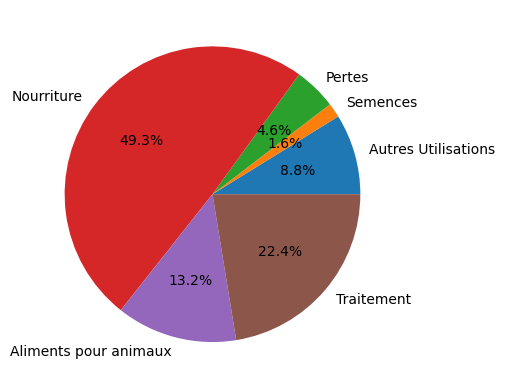

In [57]:
fig, ax = plt.subplots()
ax.pie(value_dispo_int, labels=labels, autopct='%1.1f%%')
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [58]:
#Création d'une liste avec toutes les variables
cereale_list = ['Blé', 'Riz', 'Eq Blanchi', 'Riz (Eq Blanchi)', 'Orge', 'Maïs', 'Seigle', 'Avoine', 'Millet', 'Sorgho', 'Céréales']

In [59]:
#Création d'un dataframe avec les informations uniquement pour ces céréales
dispo_cereale = dispo_alimentaire_population[dispo_alimentaire_population['Produit'].isin(cereale_list)]

In [60]:
dispo_cereale.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,dispo_kcal
7,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5992.0,...,1173.0,4895.0,775.0,5169.0,322.0,0.0,-350.0,2017,36296113.0,4.968938e+10
32,Afghanistan,Maïs,vegetale,200.0,0.0,21.0,2.50,0.30,0.56,313.0,...,1.0,76.0,31.0,312.0,5.0,0.0,0.0,2017,36296113.0,7.622184e+08
34,Afghanistan,Millet,vegetale,0.0,0.0,3.0,0.40,0.02,0.08,13.0,...,0.0,12.0,1.0,13.0,0.0,0.0,0.0,2017,36296113.0,1.088883e+08
40,Afghanistan,Orge,vegetale,360.0,0.0,26.0,2.92,0.24,0.79,524.0,...,10.0,89.0,52.0,514.0,22.0,0.0,0.0,2017,36296113.0,9.436989e+08
47,Afghanistan,Riz (Eq Blanchi),vegetale,0.0,0.0,141.0,13.82,0.27,2.70,461.0,...,119.0,422.0,24.0,342.0,14.0,0.0,0.0,2017,36296113.0,5.117752e+09


In [61]:
columns_dispo_cereales = ['Autres Utilisations', 'Semences', 'Pertes', 'Nourriture', 'Aliments pour animaux', 'Traitement']
utilisations_cereales = pd.DataFrame(columns=["Colonnes", "Somme"])

In [62]:
for colonne in columns_dispo_cereales:
    somme = dispo_cereale[colonne].sum()
    df_colonne_somme = pd.DataFrame({"Colonnes": [colonne], "Somme": [somme]})
    utilisations_cereales = pd.concat([utilisations_cereales, df_colonne_somme], ignore_index=True)

In [63]:
values_cereales_test = []
for index, row in utilisations_cereales.iterrows():
    print(f'Somme pour {row["Colonnes"]} : {row["Somme"]}')
    values_cereales_test.append(row["Somme"])

Somme pour Autres Utilisations : 231284.0
Somme pour Semences : 66531.0
Somme pour Pertes : 105926.0
Somme pour Nourriture : 1015156.0
Somme pour Aliments pour animaux : 840833.0
Somme pour Traitement : 91623.0


[231284.0, 66531.0, 105926.0, 1015156.0, 840833.0, 91623.0]


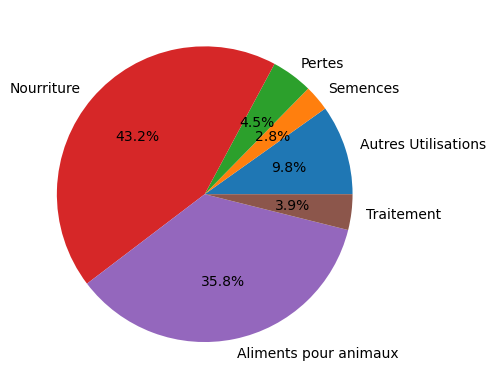

In [64]:
print(values_cereales_test)
fig, ax = plt.subplots()
ax.pie(values_cereales_test, labels=columns_dispo_cereales, autopct='%1.1f%%')
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [65]:
#Création de la colonne proportion par pays
population_2017 = pd.merge(population[population['Année']==2017], sous_nutrition[sous_nutrition['Année'].isin(['2015-2017', '2016-2018', '2017-2019'])], on='Zone', how='inner')

In [66]:
population_2017.head()

,Zone,Année_x,Population,Année_y,sous_nutrition
0,Afghanistan,2017,36296113.0,2015-2017,9700000.0
1,Afghanistan,2017,36296113.0,2016-2018,10500000.0
2,Afghanistan,2017,36296113.0,2017-2019,11100000.0
3,Afrique du Sud,2017,57009756.0,2015-2017,3000000.0
4,Afrique du Sud,2017,57009756.0,2016-2018,3100000.0


In [67]:
population_2017.drop('Année_y', axis=1, inplace=True)

In [68]:
population_2017.drop_duplicates(subset=['Zone'], inplace=True)

In [69]:
population_2017.rename(columns = {'Année_x' : 'Année'}, inplace=True)
population_2017.head()

,Zone,Année,Population,sous_nutrition
0,Afghanistan,2017,36296113.0,9700000.0
3,Afrique du Sud,2017,57009756.0,3000000.0
6,Albanie,2017,2884169.0,100000.0
9,Algérie,2017,41389189.0,1300000.0
12,Allemagne,2017,82658409.0,0.0


In [70]:
population_2017.columns

Index(['Zone', 'Année', 'Population', 'sous_nutrition'], dtype='object')

In [71]:
population_2017['prop_pays'] = round((population_2017['sous_nutrition'] / population_2017['Population'])*100, 2)

In [72]:
#affichage après trie des 10 pires pays
pop_2017_sorted = population_2017.sort_values(by='prop_pays', ascending=False)

In [73]:
pop_2017_sorted.head(10)

,Zone,Année,Population,sous_nutrition,prop_pays
234,Haïti,2017,10982366.0,5200000.0,47.35
471,République populaire démocratique de Corée,2017,25429825.0,11600000.0,45.62
324,Madagascar,2017,25570512.0,10300000.0,40.28
309,Libéria,2017,4702226.0,1800000.0,38.28
300,Lesotho,2017,2091534.0,800000.0,38.25
549,Tchad,2017,15016753.0,5300000.0,35.29
483,Rwanda,2017,11980961.0,4100000.0,34.22
558,Timor-Leste,2017,1243258.0,400000.0,32.17
363,Mozambique,2017,28649018.0,9200000.0,32.11
0,Afghanistan,2017,36296113.0,9700000.0,26.72


C:\Users\damii\AppData\Local\Temp\ipykernel_26512\587715481.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])  # Formater les étiquettes de l'axe Y avec le symbole %


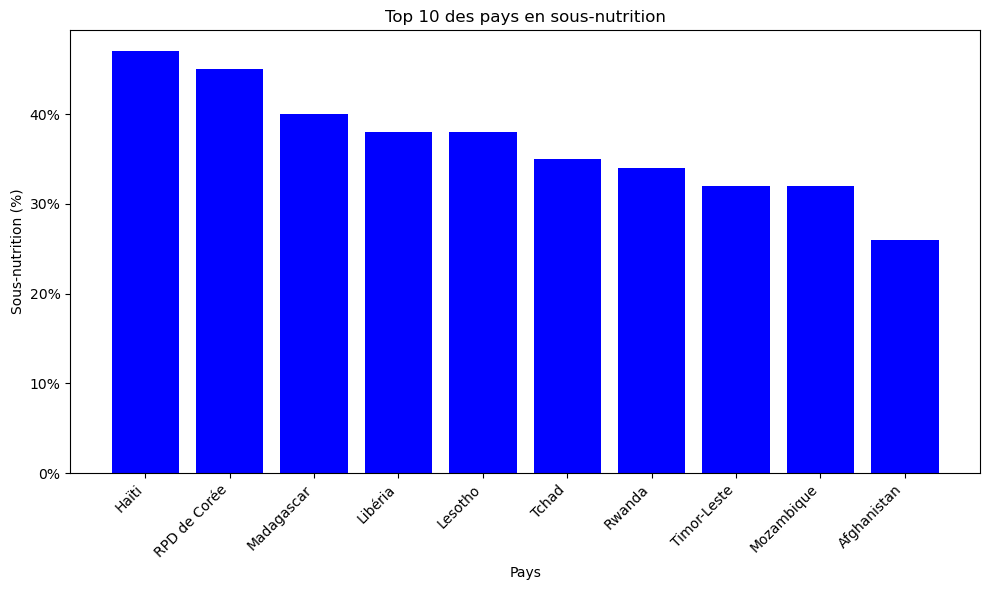

In [74]:
top_pays_sous_nutrition = ['Haïti', 'RPD de Corée', 'Madagascar', 'Libéria', 'Lesotho,' 'Tchad', 'Rwanda', 'Timor-Leste', 'Mozambique', 'Afghanistan']
value_top_sous_nutrition = [47, 45, 40, 38, 38, 35, 34, 32, 32, 26]

# Données
top_pays_sous_nutrition = ['Haïti', 'RPD de Corée', 'Madagascar', 'Libéria', 'Lesotho', 'Tchad', 'Rwanda', 'Timor-Leste', 'Mozambique', 'Afghanistan']
value_top_sous_nutrition = [47, 45, 40, 38, 38, 35, 34, 32, 32, 26]

# Créer le graphique à barres avec des couleurs personnalisées
plt.figure(figsize=(10, 6))  # Définir la taille du graphique
plt.bar(top_pays_sous_nutrition, value_top_sous_nutrition, color=['blue'])  # Créer le graphique à barres avec des couleurs personnalisées
plt.xlabel('Pays')  # Étiquette de l'axe des x
plt.ylabel('Sous-nutrition (%)')  # Étiquette de l'axe des y avec le symbole %
plt.title('Top 10 des pays en sous-nutrition')  # Titre du graphique
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes de l'axe des x pour une meilleure lisibilité
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])  # Formater les étiquettes de l'axe Y avec le symbole %
plt.tight_layout()  # Ajuster le graphique pour s'assurer que tout est visible
plt.show()  # Afficher le graphique


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [75]:
#calcul du total de l'aide alimentaire par pays
aide_alim_pays = aide_alimentaire.groupby(['Zone']).sum()

C:\Users\damii\AppData\Local\Temp\ipykernel_26512\3247693079.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aide_alim_pays = aide_alimentaire.groupby(['Zone']).sum()


In [76]:
aide_alim_pays.head()

,Année,Valeur
Zone,,
Afghanistan,32216,185452000
Algérie,78561,81114000
Angola,8054,5014000
Bangladesh,50347,348188000
Bhoutan,24170,2666000


In [77]:
aide_alim_pays_sorted = aide_alim_pays.sort_values(by='Valeur', ascending=False)

In [78]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire
aide_alim_pays_sorted[['Valeur']].head(10)

,Valeur
Zone,
République arabe syrienne,1858943000
Éthiopie,1381294000
Yémen,1206484000
Soudan du Sud,695248000
Soudan,669784000
Kenya,552836000
Bangladesh,348188000
Somalie,292678000
République démocratique du Congo,288502000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [79]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année 
aide_alim_pays_an = aide_alimentaire.groupby(by=['Zone', 'Année']).sum().reset_index()

C:\Users\damii\AppData\Local\Temp\ipykernel_26512\1253654525.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aide_alim_pays_an = aide_alimentaire.groupby(by=['Zone', 'Année']).sum().reset_index()


In [80]:
aide_alim_pays_an.head(10)

,Zone,Année,Valeur
0,Afghanistan,2013,128238000
1,Afghanistan,2014,57214000
2,Algérie,2013,35234000
3,Algérie,2014,18980000
4,Algérie,2015,17424000
5,Algérie,2016,9476000
6,Angola,2013,5000000
7,Angola,2014,14000
8,Bangladesh,2013,131018000
9,Bangladesh,2014,194628000


In [81]:
aide_alim_5_pays = aide_alim_pays_an.loc[aide_alim_pays_an['Zone'].isin(['République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud', 'Soudan']), :]

In [82]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire
print(aide_alim_5_pays)

                          Zone  Année     Valeur
157  République arabe syrienne   2013  563566000
158  République arabe syrienne   2014  651870000
159  République arabe syrienne   2015  524949000
160  République arabe syrienne   2016  118558000
189                     Soudan   2013  330230000
190                     Soudan   2014  321904000
191                     Soudan   2015   17650000
192              Soudan du Sud   2013  196330000
193              Soudan du Sud   2014  450610000
194              Soudan du Sud   2015   48308000
214                      Yémen   2013  264764000
215                      Yémen   2014  103840000
216                      Yémen   2015  372306000
217                      Yémen   2016  465574000
225                   Éthiopie   2013  591404000
226                   Éthiopie   2014  586624000
227                   Éthiopie   2015  203266000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


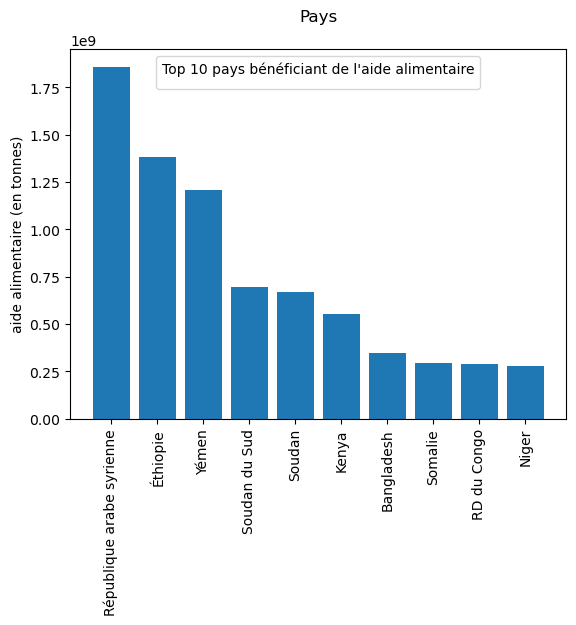

In [83]:
pays = ['République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud', 'Soudan', 'Kenya', 'Bangladesh', 'Somalie', 'RD du Congo', 'Niger']
value_aide_alim = [1858943000, 1381294000, 1206484000, 695248000, 669784000, 552836000, 348188000, 292678000, 288502000, 276344000]

fig, ax = plt.subplots()
ax.bar(pays, value_aide_alim)
ax.set_ylabel('aide alimentaire (en tonnes)')
ax.legend(title='Top 10 pays bénéficiant de l\'aide alimentaire', loc='upper center')  # Légende sous l'axe X
ax.tick_params(axis='x', rotation=90)
ax.set_title('Pays', pad=20)  # Titre au-dessus du graphe avec un décalage (pad) pour l'espacement
plt.show()

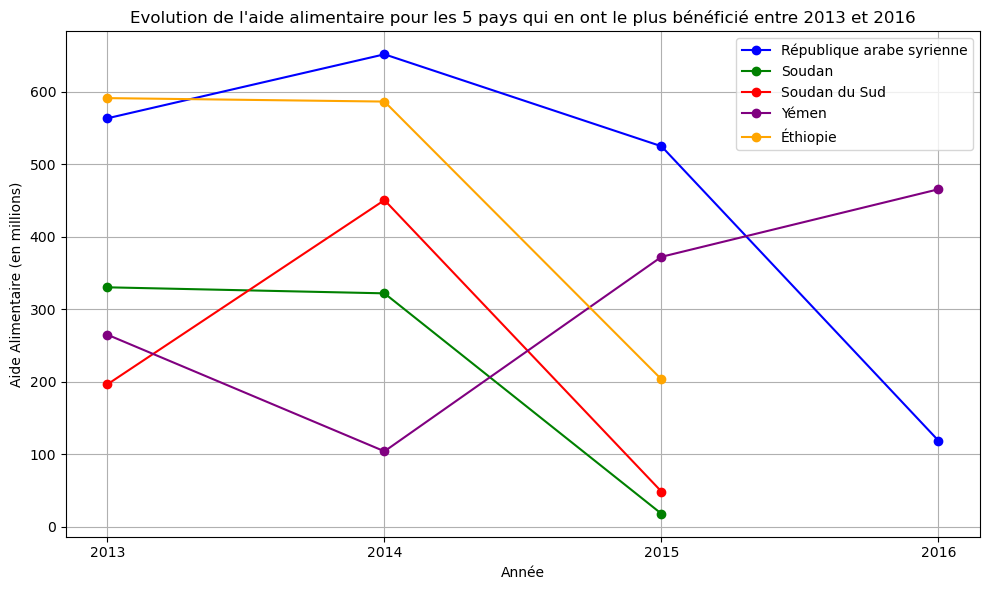

In [84]:
from collections import defaultdict

# Données
data = [['Zone', 'Année', 'aide_alimentaire'], 
['République arabe syrienne', '2013', 563566000], 
['République arabe syrienne', '2014', 651870000], 
['République arabe syrienne', '2015', 524949000], 
['République arabe syrienne', '2016', 118558000], 
['Soudan', '2013', 330230000], 
['Soudan', '2014', 321904000], 
['Soudan', '2015', 17650000], 
['Soudan du Sud', '2013', 196330000], 
['Soudan du Sud', '2014', 450610000], 
['Soudan du Sud', '2015', 48308000], 
['Yémen', '2013', 264764000], 
['Yémen', '2014', 103840000], 
['Yémen', '2015', 372306000], 
['Yémen', '2016', 465574000], 
['Éthiopie', '2013', 591404000], 
['Éthiopie', '2014', 586624000], 
['Éthiopie', '2015', 203266000]]

# Créer un dictionnaire pour stocker les données
aide_alimentaire_par_pays = defaultdict(list)

# Remplir le dictionnaire avec les données
for row in data[1:]:
    pays, annee, aide = row
    aide_alimentaire_par_pays[pays].append((annee, aide))

# Créer le graphique en lignes avec des valeurs en millions pour l'axe Y
plt.figure(figsize=(10, 6))

# Liste de couleurs personnalisées
colors = ['blue', 'green', 'red', 'purple', 'orange']

for i, (pays, aide) in enumerate(aide_alimentaire_par_pays.items()):
    annees, aides = zip(*aide)  # Séparer les années et les montants d'aide
    aides = [aide / 1e6 for aide in aides]  # Convertir les aides en millions
    plt.plot(annees, aides, marker='o', label=pays, color=colors[i % len(colors)])  # Utiliser les couleurs personnalisées cycliquement

plt.xlabel('Année')
plt.ylabel('Aide Alimentaire (en millions)')
plt.title("Evolution de l'aide alimentaire pour les 5 pays qui en ont le plus bénéficié entre 2013 et 2016")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [85]:
#On filtre sur le dataframe avec notre liste


In [86]:
# Affichage des pays avec l'aide alimentaire par année


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [87]:
top10_pays_dispo_alim = ['Austria', 'Belgium', 'Turkey', 'United States of America', 'Israel', 'Ireland', 'Italy', 'Luxembourg', 'Egypt', 'Germany']
top10_dispo_alim = [3770.0, 3737.0, 3708.0, 3682.0, 3610.0, 3602.0, 3578.0, 3540.0, 3518.0, 3503.0]


last10_pays_dispo_alim = ['Central African Rep.', 'Zambia', 'Madagascar', 'Afghanistan', 'Haiti', 'North Korea', 'Chad', 'Zimbabwe', 'Uganda', 'Timor-Leste']
last10_dispo_alim = [1879.0, 1924.0, 2056.0, 2087.0, 2089.0, 2093.0, 2109.0, 2113.0, 2126.0, 2129.0]


In [88]:
#Calcul de la disponibilité en kcal par personne par jour par pays
dispo_alim_pays = dispo_alimentaire.groupby(by='Zone').sum()

C:\Users\damii\AppData\Local\Temp\ipykernel_26512\3382098994.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dispo_alim_pays = dispo_alimentaire.groupby(by='Zone').sum()


In [89]:
dispo_alim_pays.columns

Index(['Aliments pour animaux', 'Autres Utilisations',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Semences', 'Traitement', 'Variation de stock'],
      dtype='object')

In [90]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne 
dispo_alim_pays.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=True).head(10)

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,
République centrafricaine,1.0,27.0,1879.0,453.73,59.41,46.04,2582.0,0.0,76.0,2092.0,122.0,2503.0,63.0,278.0,3.0
Zambie,408.0,69.0,1924.0,350.12,42.05,55.22,10041.0,675.0,380.0,5088.0,242.0,10526.0,76.0,4178.0,-182.0
Madagascar,842.0,2522.0,2056.0,425.07,24.49,46.69,15216.0,236.0,924.0,9741.0,966.0,14160.0,375.0,844.0,375.0
Afghanistan,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0
Haïti,481.0,115.0,2089.0,397.78,48.92,47.70,6175.0,15.0,1204.0,4101.0,679.0,5072.0,36.0,762.0,-77.0
République populaire démocratique de Corée,816.0,695.0,2093.0,458.93,36.41,54.99,14876.0,83.0,993.0,11425.0,1066.0,13883.0,194.0,678.0,84.0
Tchad,104.0,2.0,2109.0,319.45,47.10,62.75,5304.0,0.0,290.0,4097.0,459.0,5153.0,101.0,542.0,-141.0
Zimbabwe,131.0,23.0,2113.0,336.59,57.18,48.32,9507.0,278.0,1342.0,4762.0,188.0,7914.0,76.0,4330.0,531.0
Ouganda,348.0,68.0,2126.0,535.58,46.57,52.64,26624.0,1218.0,1257.0,20121.0,991.0,26321.0,154.0,4982.0,269.0


C:\Users\damii\AppData\Local\Temp\ipykernel_26512\1348564551.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


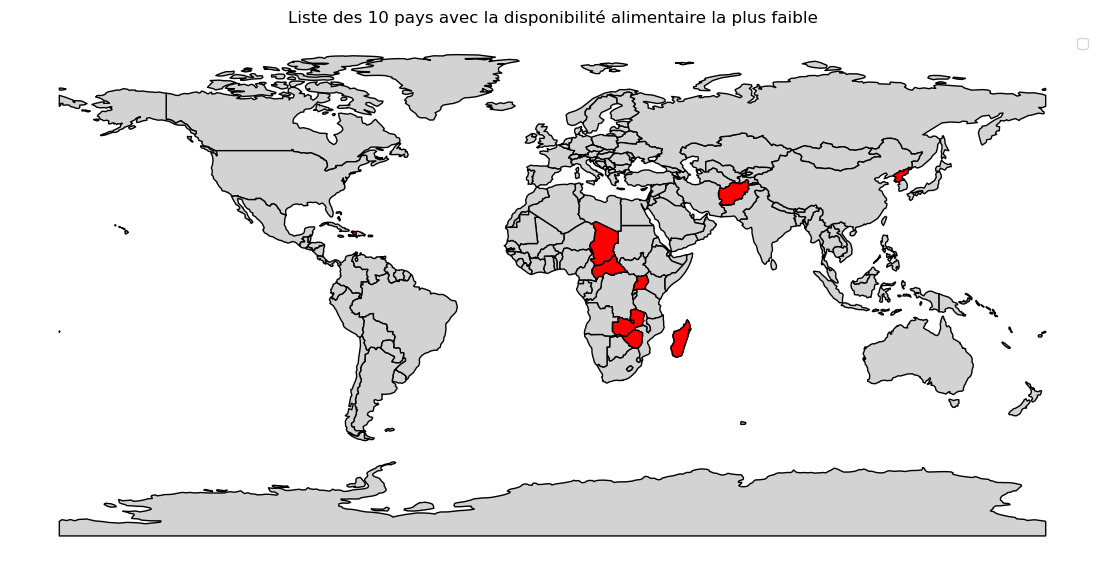

In [91]:
# Charger le fichier shapefile du monde
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Créer une colonne pour indiquer si le pays est dans l'une des listes
#world['in_top10'] = world['name'].isin(top10_pays_dispo_alim)
world['in_last10'] = world['name'].isin(last10_pays_dispo_alim)

# Plot de la carte du monde avec coloration différente pour les deux ensembles de pays
fig, ax = plt.subplots(figsize=(14, 7))

# Plot de tous les pays
world.plot(ax=ax, color='lightgrey', edgecolor='black')

# Coloration des pays dans top10_pays_dispo_alim en vert
# world[world['in_top10']].plot(ax=ax, color='green', edgecolor='black')

# Coloration des pays dans last10_pays_dispo_alim en bleu
world[world['in_last10']].plot(ax=ax, color='red', edgecolor='black')

# Légende
ax.legend(['Other Countries', 'Last 10 Countries'])

# Titre
plt.title('Liste des 10 pays avec la disponibilité alimentaire la plus faible')

# Masquer les axes
ax.set_axis_off()

# Afficher la carte
plt.show()

C:\Users\damii\AppData\Local\Temp\ipykernel_26512\743013110.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


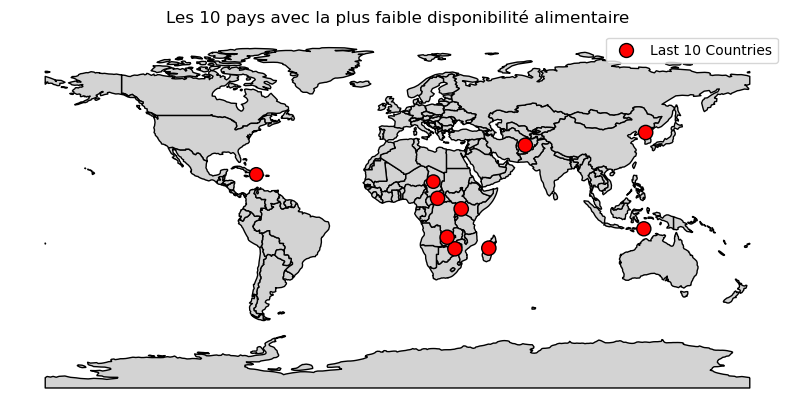

In [92]:
# Charger le fichier shapefile du monde
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Créer une colonne pour indiquer si le pays est dans l'une des listes
world['in_top10'] = world['name'].isin(top10_pays_dispo_alim)
world['in_last10'] = world['name'].isin(last10_pays_dispo_alim)

# Plot de la carte du monde avec coloration différente pour les deux ensembles de pays
fig, ax = plt.subplots(figsize=(10, 6))

# Plot de tous les pays
world.plot(ax=ax, color='lightgrey', edgecolor='black')

# Création de points pour les pays dans top10_pays_dispo_alim
#top10_points = world[world['in_top10']].representative_point()
# Création de points pour les pays dans last10_pays_dispo_alim
last10_points = world[world['in_last10']].representative_point()

# Taille des points en fonction des valeurs
#top10_sizes = [v / 20 for v in top10_dispo_alim]  # Adapter le facteur multiplicatif selon les valeurs
last10_sizes = [v / 20 for v in last10_dispo_alim]  # Adapter le facteur multiplicatif selon les valeurs

# Scatter plot pour les pays dans top10_pays_dispo_alim avec des tailles différentes
#ax.scatter(top10_points.x, top10_points.y, s=top10_sizes, color='green', edgecolor='black', label='Top 10 Countries')

# Scatter plot pour les pays dans last10_pays_dispo_alim avec des tailles différentes
ax.scatter(last10_points.x, last10_points.y, s=last10_sizes, color='red', edgecolor='black', label='Last 10 Countries')

# Légende
ax.legend()

# Titre
plt.title('Les 10 pays avec la plus faible disponibilité alimentaire')

# Masquer les axes
ax.set_axis_off()

# Afficher la carte
plt.show()


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [93]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 
dispo_alim_pays.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=False).head(10)

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,
Autriche,3412.0,1001.0,3770.0,1069.20,170.44,106.20,19308.0,6733.0,8463.0,9085.0,459.0,18129.0,173.0,5178.0,-556.0
Belgique,5533.0,3226.0,3737.0,1002.09,161.95,99.37,29358.0,30345.0,35276.0,11134.0,564.0,24496.0,153.0,8960.0,-64.0
Turquie,17750.0,3006.0,3708.0,968.15,119.64,108.12,131377.0,14593.0,12136.0,72551.0,12036.0,137432.0,2553.0,23560.0,-3599.0
États-Unis d'Amérique,148432.0,154699.0,3682.0,1002.39,161.37,109.42,777992.0,163524.0,81887.0,320889.0,7162.0,894668.0,10403.0,141010.0,-35032.0
Israël,2525.0,801.0,3610.0,922.14,151.39,128.00,11267.0,1648.0,5883.0,7132.0,220.0,6906.0,71.0,564.0,128.0
Irlande,3758.0,1120.0,3602.0,1150.15,125.69,109.91,10738.0,6828.0,6254.0,5320.0,236.0,11501.0,89.0,399.0,-192.0
Italie,16144.0,3228.0,3578.0,993.20,154.69,108.49,97405.0,23643.0,38692.0,60584.0,1861.0,80855.0,736.0,14870.0,1496.0
Luxembourg,147.0,11.0,3540.0,1150.66,141.49,113.64,802.0,821.0,1076.0,607.0,11.0,593.0,9.0,24.0,-41.0
Égypte,15084.0,2262.0,3518.0,803.79,63.09,103.22,115133.0,5014.0,24100.0,65957.0,7608.0,95848.0,1365.0,22924.0,199.0


C:\Users\damii\AppData\Local\Temp\ipykernel_26512\106874737.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


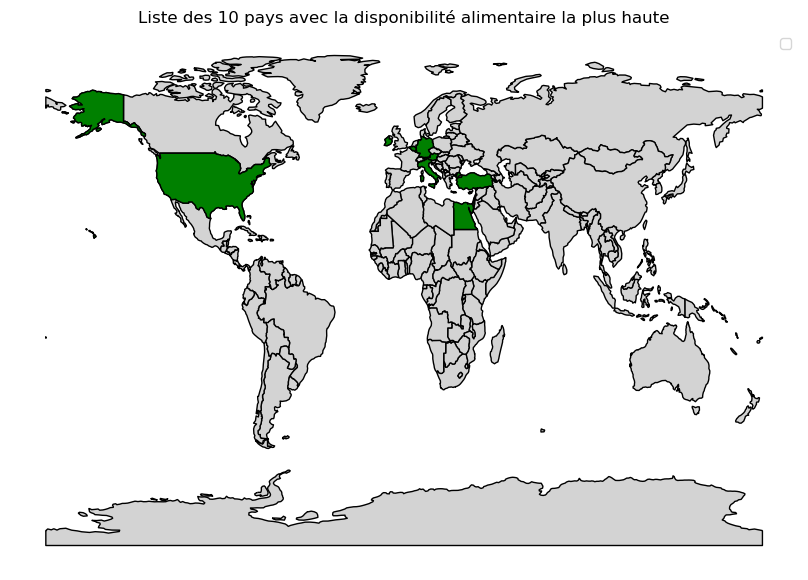

In [94]:
# Charger le fichier shapefile du monde
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Créer une colonne pour indiquer si le pays est dans l'une des listes
world['in_top10'] = world['name'].isin(top10_pays_dispo_alim)
#world['in_last10'] = world['name'].isin(last10_pays_dispo_alim)

# Plot de la carte du monde avec coloration différente pour les deux ensembles de pays
fig, ax = plt.subplots(figsize=(14, 7))

# Plot de tous les pays
world.plot(ax=ax, color='lightgrey', edgecolor='black')

# Coloration des pays dans top10_pays_dispo_alim en vert
world[world['in_top10']].plot(ax=ax, color='green', edgecolor='black')

# Coloration des pays dans last10_pays_dispo_alim en bleu
#world[world['in_last10']].plot(ax=ax, color='red', edgecolor='black')

# Légende
ax.legend(['Other Countries', 'Top 10 Countries'])

# Titre
plt.title('Liste des 10 pays avec la disponibilité alimentaire la plus haute')

# Masquer les axes
ax.set_axis_off()

# Afficher la carte
plt.show()

C:\Users\damii\AppData\Local\Temp\ipykernel_26512\1593402786.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


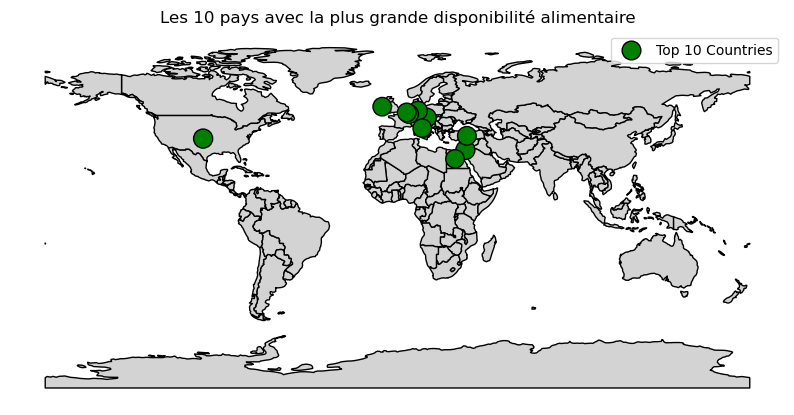

In [95]:
# Charger le fichier shapefile du monde
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Créer une colonne pour indiquer si le pays est dans l'une des listes
world['in_top10'] = world['name'].isin(top10_pays_dispo_alim)
world['in_last10'] = world['name'].isin(last10_pays_dispo_alim)

# Plot de la carte du monde avec coloration différente pour les deux ensembles de pays
fig, ax = plt.subplots(figsize=(10, 6))

# Plot de tous les pays
world.plot(ax=ax, color='lightgrey', edgecolor='black')

# Création de points pour les pays dans top10_pays_dispo_alim
top10_points = world[world['in_top10']].representative_point()
# Création de points pour les pays dans last10_pays_dispo_alim
#last10_points = world[world['in_last10']].representative_point()

# Taille des points en fonction des valeurs
top10_sizes = [v / 20 for v in top10_dispo_alim]  # Adapter le facteur multiplicatif selon les valeurs
#last10_sizes = [v / 20 for v in last10_dispo_alim]  # Adapter le facteur multiplicatif selon les valeurs

# Scatter plot pour les pays dans top10_pays_dispo_alim avec des tailles différentes
ax.scatter(top10_points.x, top10_points.y, s=top10_sizes, color='green', edgecolor='black', label='Top 10 Countries')

# Scatter plot pour les pays dans last10_pays_dispo_alim avec des tailles différentes
#ax.scatter(last10_points.x, last10_points.y, s=last10_sizes, color='red', edgecolor='black', label='Last 10 Countries')

# Légende
ax.legend()

# Titre
plt.title('Les 10 pays avec la plus grande disponibilité alimentaire')

# Masquer les axes
ax.set_axis_off()

# Afficher la carte
plt.show()


C:\Users\damii\AppData\Local\Temp\ipykernel_26512\2521194152.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


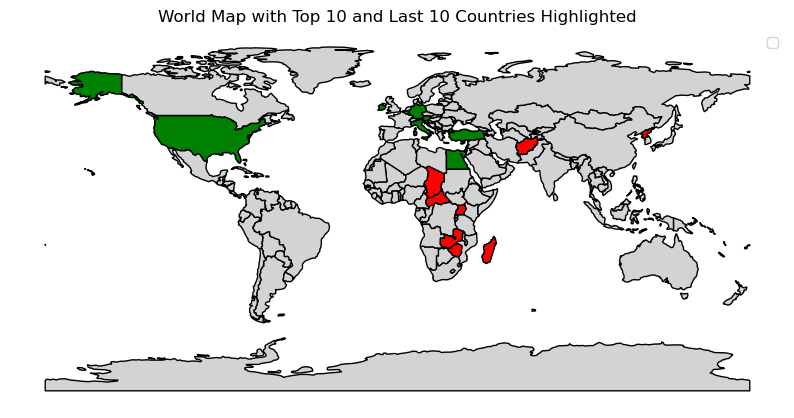

In [96]:
# Charger le fichier shapefile du monde
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Créer une colonne pour indiquer si le pays est dans l'une des listes
world['in_top10'] = world['name'].isin(top10_pays_dispo_alim)
world['in_last10'] = world['name'].isin(last10_pays_dispo_alim)

# Plot de la carte du monde avec coloration différente pour les deux ensembles de pays
fig, ax = plt.subplots(figsize=(10, 6))

# Plot de tous les pays
world.plot(ax=ax, color='lightgrey', edgecolor='black')

# Coloration des pays dans top10_pays_dispo_alim en vert
world[world['in_top10']].plot(ax=ax, color='green', edgecolor='black')

# Coloration des pays dans last10_pays_dispo_alim en bleu
world[world['in_last10']].plot(ax=ax, color='red', edgecolor='black')

# Légende
ax.legend(['Other Countries', 'Top 10 Countries', 'Last 10 Countries'])

# Titre
plt.title('World Map with Top 10 and Last 10 Countries Highlighted')

# Masquer les axes
ax.set_axis_off()

# Afficher la carte
plt.show()


C:\Users\damii\AppData\Local\Temp\ipykernel_26512\3338938807.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


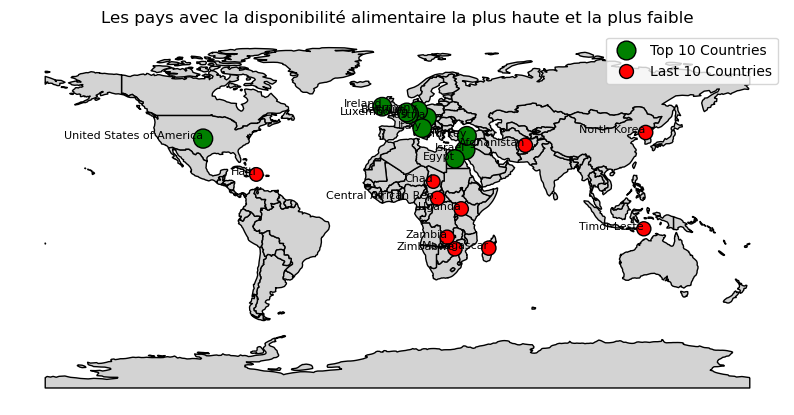

In [97]:
# Charger le fichier shapefile du monde
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Créer une colonne pour indiquer si le pays est dans l'une des listes
world['in_top10'] = world['name'].isin(top10_pays_dispo_alim)
world['in_last10'] = world['name'].isin(last10_pays_dispo_alim)

# Plot de la carte du monde avec coloration différente pour les deux ensembles de pays
fig, ax = plt.subplots(figsize=(10, 6))

# Plot de tous les pays
world.plot(ax=ax, color='lightgrey', edgecolor='black')

# Création de points pour les pays dans top10_pays_dispo_alim
top10_points = world[world['in_top10']].representative_point()
# Création de points pour les pays dans last10_pays_dispo_alim
last10_points = world[world['in_last10']].representative_point()

# Taille des points en fonction des valeurs
top10_sizes = [v / 20 for v in top10_dispo_alim]  # Réduction de la taille des points par rapport à la valeur
last10_sizes = [v / 20 for v in last10_dispo_alim]  # Réduction de la taille des points par rapport à la valeur

# Scatter plot pour les pays dans top10_pays_dispo_alim avec des tailles différentes
top10_scatter = ax.scatter(top10_points.x, top10_points.y, s=top10_sizes, color='green', edgecolor='black', label='Top 10 Countries')

# Scatter plot pour les pays dans last10_pays_dispo_alim avec des tailles différentes
last10_scatter = ax.scatter(last10_points.x, last10_points.y, s=last10_sizes, color='red', edgecolor='black', label='Last 10 Countries')

# Ajout des annotations pour les noms des pays avec des points
for i, txt in enumerate(world[world['in_top10']]['name']):
    ax.annotate(txt, (top10_points.x.iloc[i], top10_points.y.iloc[i]), fontsize=8, ha='right')

for i, txt in enumerate(world[world['in_last10']]['name']):
    ax.annotate(txt, (last10_points.x.iloc[i], last10_points.y.iloc[i]), fontsize=8, ha='right')

# Légende
ax.legend()

# Titre
plt.title('Les pays avec la disponibilité alimentaire la plus haute et la plus faible')

# Masquer les axes
ax.set_axis_off()

# Afficher la carte
plt.show()


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [98]:
#création d'un dataframe avec uniquement la Thaïlande 
dispo_alim_thai = dispo_alimentaire.loc[dispo_alimentaire['Zone'] == 'Thaïlande']

In [99]:
dispo_alim_thai.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13759,Thaïlande,Abats Comestible,animale,0.0,0.0,3.0,1.11,0.09,0.56,74.0,5.0,33.0,75.0,0.0,45.0,0.0,0.0,0.0
13760,Thaïlande,"Agrumes, Autres",vegetale,0.0,0.0,0.0,0.09,0.00,0.00,8.0,6.0,2.0,6.0,0.0,12.0,0.0,2.0,0.0
13761,Thaïlande,"Alcool, non Comestible",vegetale,0.0,358.0,0.0,0.00,0.00,0.00,358.0,110.0,21.0,0.0,0.0,447.0,0.0,0.0,0.0
13762,Thaïlande,Aliments pour enfants,vegetale,0.0,0.0,2.0,0.18,0.01,0.08,12.0,7.0,19.0,12.0,0.0,0.0,0.0,0.0,0.0
13763,Thaïlande,Ananas,vegetale,0.0,0.0,10.0,10.02,0.04,0.08,782.0,1449.0,9.0,671.0,110.0,2209.0,0.0,0.0,13.0


In [100]:
#Calcul de la sous nutrition en Thaïlande
sous_nutrition_thai = sous_nutrition.loc[sous_nutrition['Zone'] == 'Thaïlande'].reset_index(drop=True)

In [101]:
sous_nutrition_thai.head(10)

,Zone,Année,sous_nutrition
0,Thaïlande,2012-2014,6200000.0
1,Thaïlande,2013-2015,6000000.0
2,Thaïlande,2014-2016,5900000.0
3,Thaïlande,2015-2017,6000000.0
4,Thaïlande,2016-2018,6200000.0
5,Thaïlande,2017-2019,6500000.0


In [102]:
population_thai = population.loc[population['Zone'] == 'Thaïlande'].reset_index(drop=True)

In [103]:
population_thai.head(10)

,Zone,Année,Population
0,Thaïlande,2013,68144518.0
1,Thaïlande,2014,68438746.0
2,Thaïlande,2015,68714511.0
3,Thaïlande,2016,68971308.0
4,Thaïlande,2017,69209810.0
5,Thaïlande,2018,69428453.0


In [104]:
round(sous_nutrition_thai['sous_nutrition'] *100 / population_thai['Population'], 2)

0    9.10
1    8.77
2    8.59
3    8.70
4    8.96
5    9.36
dtype: float64

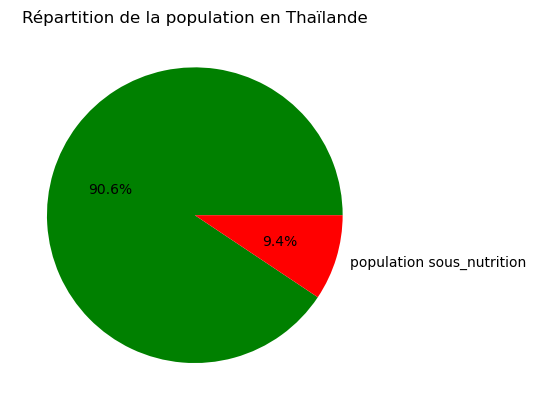

In [105]:
#Population en sous-nutrition en Thaïlande
values_pop_thai = [69428453-6500000, 6500000]
columns_pop_thai = ['', 'population sous_nutrition']
colors=['green', 'red']

fig, ax = plt.subplots()
ax.pie(values_pop_thai, labels=columns_pop_thai, autopct='%1.1f%%', colors=colors)
ax.set_title('Répartition de la population en Thaïlande')
plt.show()

In [106]:
# On calcule la proportion exportée en fonction de la production
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0


In [107]:
dispo_alim_pays.loc["Thaïlande"]

Aliments pour animaux                                              9561.00
Autres Utilisations                                                4210.00
Disponibilité alimentaire (Kcal/personne/jour)                     2785.00
Disponibilité alimentaire en quantité (kg/personne/an)              586.23
Disponibilité de matière grasse en quantité (g/personne/jour)        58.57
Disponibilité de protéines en quantité (g/personne/jour)             60.85
Disponibilité intérieure                                         158130.00
Exportations - Quantité                                           50430.00
Importations - Quantité                                           11335.00
Nourriture                                                        39283.00
Pertes                                                             5749.00
Production                                                       201764.00
Semences                                                            823.00
Traitement               

In [108]:
dispo_alimentaire.loc[dispo_alimentaire['Zone'] == 'Thaïlande'].sum()

Zone                                                             ThaïlandeThaïlandeThaïlandeThaïlandeThaïlandeT...
Produit                                                          Abats ComestibleAgrumes, AutresAlcool, non Com...
Origine                                                          animalevegetalevegetalevegetalevegetaleanimale...
Aliments pour animaux                                                                                       9561.0
Autres Utilisations                                                                                         4210.0
Disponibilité alimentaire (Kcal/personne/jour)                                                              2785.0
Disponibilité alimentaire en quantité (kg/personne/an)                                                      586.23
Disponibilité de matière grasse en quantité (g/personne/jour)                                                58.57
Disponibilité de protéines en quantité (g/personne/jour)                        

In [109]:
manioc_thai = dispo_alimentaire.loc[(dispo_alimentaire['Zone'] == 'Thaïlande') & (dispo_alimentaire['Produit'] == 'Manioc'), :]

In [110]:
manioc_thai.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,0.0,0.0,0.0


In [111]:
manioc_thai.columns

Index(['Zone', 'Produit', 'Origine', 'Aliments pour animaux',
       'Autres Utilisations', 'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Semences', 'Traitement', 'Variation de stock'],
      dtype='object')

In [112]:
prop_exportation_manioc = manioc_thai['Exportations - Quantité'] * 100 / manioc_thai['Production']
print(prop_exportation_manioc)
print('Exportation :', manioc_thai['Exportations - Quantité'])
print(manioc_thai['Production'])

13809    83.41273
dtype: float64
Exportation : 13809    25214.0
Name: Exportations - Quantité, dtype: float64
13809    30228.0
Name: Production, dtype: float64


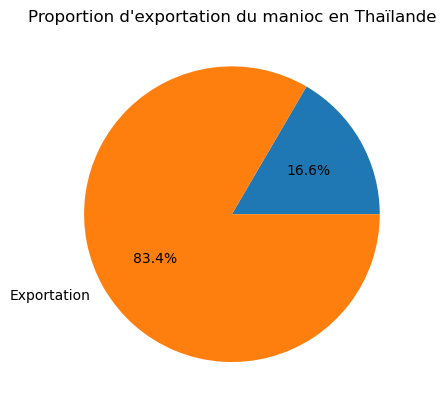

In [113]:
#Proportion de manioc exportés
values_manioc_thai = [30228-25214, 25214]
labels_manioc_thai = ['', 'Exportation']
fig, ax = plt.subplots()
ax.pie(values_manioc_thai, labels=labels_manioc_thai, autopct='%1.1f%%')
ax.set_title('Proportion d\'exportation du manioc en Thaïlande')
plt.show()

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

In [114]:
dispo_alim_vege_pop.columns

Index(['Zone', 'Produit', 'Origine', 'Aliments pour animaux',
       'Autres Utilisations', 'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Semences', 'Traitement', 'Variation de stock', 'Année', 'Population',
       'dispo_kcal'],
      dtype='object')

In [115]:
dispo_prot_vege = dispo_alim_vege_pop['Disponibilité de protéines en quantité (g/personne/jour)'].sum()
print('Protéines vegetales : {} g/personne/jour'.format(round(dispo_prot_vege, 2)))

Protéines vegetales : 7620.72 g/personne/jour


In [116]:
dispo_int_vege = dispo_alim_vege_pop['Disponibilité intérieure'].sum()
dispo_nourriture_vege = dispo_alim_vege_pop['Nourriture'].sum()

print(dispo_int_vege)
print(dispo_nourriture_vege)

prop_vege = dispo_nourriture_vege / dispo_int_vege


print(prop_vege)

8396035.0
3647478.0
0.4344286320864551


In [117]:
round(dispo_prot_vege * prop_vege, 2)

3310.66

In [118]:
dispo_vege_pays = dispo_alim_vege_pop.groupby(['Zone']).sum()
dispo_vege_pays['Disponibilité de protéines en quantité (g/personne/jour)'].mean()

C:\Users\damii\AppData\Local\Temp\ipykernel_26512\3748058980.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dispo_vege_pays = dispo_alim_vege_pop.groupby(['Zone']).sum()


44.30651162790697

In [119]:
dispo_vege_pays_sorted = dispo_vege_pays.sort_values(by='Disponibilité de protéines en quantité (g/personne/jour)', ascending=True)

In [120]:
dispo_vege_pays_sorted.head(10)

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,dispo_kcal
Zone,,,,,,,,,,,,,,,,,,
Équateur,1001.0,1905.0,1732.0,327.21,49.48,24.80,14926.0,7142.0,1475.0,5149.0,654.0,20042.0,125.0,6200.0,555.0,147241,1.225331e+09,2.907225e+10
Antigua-et-Barbuda,0.0,10.0,1635.0,420.14,37.55,26.66,45.0,0.0,40.0,34.0,0.0,11.0,0.0,0.0,-7.0,141190,6.679820e+06,1.560215e+08
Saint-Kitts-et-Nevis,0.0,3.0,1821.0,343.60,49.57,26.74,23.0,1.0,11.0,16.0,0.0,10.0,0.0,3.0,3.0,125054,3.226790e+06,9.477394e+07
Grenade,14.0,7.0,1864.0,405.73,50.12,27.64,74.0,2.0,31.0,41.0,3.0,42.0,0.0,8.0,2.0,131105,7.206810e+06,2.066691e+08
République centrafricaine,1.0,26.0,1673.0,398.32,45.47,28.92,2321.0,0.0,64.0,1837.0,119.0,2254.0,62.0,278.0,3.0,131105,2.987415e+08,7.689146e+09
Congo,16.0,43.0,2021.0,510.61,37.51,29.17,3230.0,6.0,429.0,2272.0,341.0,2832.0,3.0,554.0,-22.0,135139,3.424166e+08,1.032871e+10
Libéria,35.0,7.0,2105.0,358.85,52.97,29.52,1886.0,34.0,406.0,1539.0,110.0,1481.0,15.0,179.0,35.0,106901,2.492180e+08,9.898186e+09
Bahamas,0.0,46.0,1828.0,588.37,39.56,29.72,327.0,1.0,172.0,219.0,2.0,155.0,0.0,59.0,0.0,137156,2.595934e+07,6.978481e+08
Bermudes,0.0,14.0,1858.0,583.65,51.84,30.08,34.0,24.0,54.0,35.0,0.0,5.0,0.0,0.0,0.0,121020,3.782940e+06,1.171450e+08


In [121]:
dispo_vege_pays_sorted['Disponibilité de protéines en quantité (g/personne/jour)']

Zone
Équateur                     24.80
Antigua-et-Barbuda           26.66
Saint-Kitts-et-Nevis         26.74
Grenade                      27.64
République centrafricaine    28.92
                             ...  
Burkina Faso                 68.29
Tunisie                      70.11
Maroc                        71.24
Turquie                      71.82
Égypte                       76.88
Name: Disponibilité de protéines en quantité (g/personne/jour), Length: 172, dtype: float64

In [122]:
dispo_vege_pays_sorted.tail(10)

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,dispo_kcal
Zone,,,,,,,,,,,,,,,,,,
Émirats arabes unis,1174.0,2619.0,2718.0,473.18,53.00,62.81,9623.0,3326.0,12546.0,4426.0,675.0,780.0,0.0,804.0,-376.0,141190,6.641042e+08,2.578622e+10
Azerbaïdjan,1604.0,510.0,2602.0,647.50,22.17,63.03,9440.0,697.0,2548.0,6094.0,232.0,7539.0,416.0,581.0,52.0,141190,6.891724e+08,2.561752e+10
Iran (République islamique d'),9675.0,1267.0,2784.0,691.32,53.66,65.05,81667.0,2540.0,15955.0,53541.0,5082.0,69142.0,1171.0,10971.0,-887.0,143207,5.727846e+09,2.245961e+11
Niger,786.0,106.0,2344.0,372.88,39.16,66.21,9437.0,186.0,879.0,6647.0,1167.0,8555.0,446.0,279.0,189.0,143207,1.533769e+09,5.063598e+10
Algérie,4352.0,1706.0,2915.0,632.35,54.12,66.94,35510.0,649.0,14672.0,24797.0,3587.0,21964.0,428.0,637.0,-479.0,145224,2.980022e+09,1.206495e+11
Burkina Faso,39.0,450.0,2558.0,504.79,51.24,68.29,11098.0,374.0,1103.0,8547.0,609.0,11109.0,148.0,1367.0,-737.0,137156,1.305140e+09,4.909629e+10
Tunisie,2150.0,159.0,2971.0,670.61,68.60,70.11,12162.0,923.0,4588.0,7378.0,670.0,8158.0,144.0,1662.0,339.0,141190,8.003410e+08,3.396876e+10
Maroc,3652.0,1050.0,3071.0,596.10,47.87,71.24,30869.0,2161.0,6877.0,19675.0,2142.0,26263.0,561.0,3793.0,-114.0,143207,2.526269e+09,1.092700e+11
Turquie,14864.0,2944.0,3141.0,719.76,83.04,71.82,108530.0,13512.0,11484.0,53939.0,10810.0,114236.0,2468.0,23560.0,-3678.0,143207,5.759268e+09,2.547868e+11


In [123]:
dispo_vege_produit = dispo_alim_vege_pop.groupby(['Produit']).mean()
dispo_vege_produit['Disponibilité de protéines en quantité (g/personne/jour)'].sum()

C:\Users\damii\AppData\Local\Temp\ipykernel_26512\3153777597.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dispo_vege_produit = dispo_alim_vege_pop.groupby(['Produit']).mean()


45.341344742176126

In [124]:
dispo_vege_produit.sort_values(by='Disponibilité de protéines en quantité (g/personne/jour)', ascending=False)

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,dispo_kcal
Produit,,,,,,,,,,,,,,,,,,
Blé,707.476744,121.691860,550.476744,70.629128,3.149767,16.073547,3846.901163,1135.313953,1050.156977,2619.656977,158.482558,4022.215116,196.540698,43.680233,-90.191860,2017.0,4.239477e+07,2.223687e+10
Riz (Eq Blanchi),195.238372,107.087209,307.610465,31.240000,0.719244,5.959767,2762.447674,239.668605,214.430233,2190.872093,159.174419,2880.505814,70.895349,39.186047,-92.779070,2017.0,4.239477e+07,2.301463e+10
Maïs,3167.127907,1097.813953,179.523256,21.438779,1.578023,4.479884,5541.872093,746.000000,699.662791,726.744186,236.238372,5909.034884,39.651163,274.726744,-320.831395,2017.0,4.239477e+07,6.407578e+09
"Légumes, Autres",286.511628,2.848837,45.500000,63.651337,0.363895,2.167558,5096.436047,256.808140,233.273256,4404.209302,403.203488,5118.494186,0.616279,1.348837,1.476744,2017.0,4.239477e+07,3.081557e+09
Légumineuses Autres,41.313609,4.828402,29.065089,3.106864,0.196450,1.866805,229.875740,30.781065,32.189349,160.485207,11.378698,227.532544,11.893491,0.000000,0.970414,2017.0,4.292447e+07,1.642212e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sucre Eq Brut,0.523256,76.337209,254.098837,26.060872,0.000000,0.000000,965.267442,393.069767,349.040698,818.703488,1.401163,1030.122093,0.000000,63.866279,-20.813953,2017.0,4.239477e+07,8.383711e+09
Huile d'Olive,0.005917,1.828402,15.597633,0.645503,1.767870,0.000000,17.798817,10.934911,10.804734,16.017751,0.000000,20.976331,0.000000,0.000000,-3.029586,2017.0,4.295042e+07,3.964768e+08
Huile de Sésame,0.000000,2.606667,2.446667,0.100400,0.276467,0.000000,7.393333,0.540000,0.733333,4.760000,0.000000,7.200000,0.000000,0.006667,0.000000,2017.0,4.716514e+07,1.241757e+08
